In [15]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
import os
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.features import SelectPFeatures
from src.features import FeaturePlots as fp


In [16]:
sf = SelectPFeatures()

## Load the data

In [17]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/p.train.csv')
test = pd.read_csv(f'{data_dir}/p.test.csv')

In [18]:
train.shape

(55622, 61)

In [19]:
train['station'].unique()

array(['YHB', 'YDC', 'YWB', 'MCID', 'YHL', 'YMR', 'YHH', 'B207', 'YPP',
       'YPM', 'YLT', 'QLMT', 'H17A', 'B208', 'LKWY', 'FLWY', 'YGC',
       'TPMT', 'YMC', 'YML', 'B206', 'B944', 'YLA', 'YUF', 'YTP', 'YNR',
       'YNM', 'YFT', 'YPC', 'YJC', 'YMS', 'YMV', 'B950', 'YDD'],
      dtype=object)

## Process the features

In [20]:
X_train, y_train, scaler, feature_names = sf.get_X_y(train, source_dist_type='all')

X shape: (55622, 47), y shape: (55622,)


In [21]:
print(feature_names)

['amp_ratio_1' 'amp_ratio_2' 'amp_ratio_3' 'amp_ratio_4' 'amp_ratio_5'
 'amp_ratio_6' 'amp_ratio_7' 'amp_ratio_8' 'amp_ratio_9' 'amp_ratio_10'
 'amp_ratio_11' 'amp_ratio_12' 'amp_ratio_13' 'amp_ratio_14'
 'amp_ratio_15' 'amp_ratio_16' 'amp_ratio_17' 'amp_ratio_18' 'amp_1'
 'amp_2' 'amp_3' 'amp_4' 'amp_5' 'amp_6' 'amp_7' 'amp_8' 'amp_9' 'amp_10'
 'amp_11' 'amp_12' 'amp_13' 'amp_14' 'amp_15' 'amp_16' 'amp_17' 'amp_18'
 'signal_dominant_frequency' 'signal_dominant_amplitude'
 'noise_max_amplitude' 'signal_max_amplitude' 'signal_variance'
 'noise_variance' 'source_depth_km' 'source_latitude' 'source_longitude'
 'source_receiver_distance_logkm' 'source_receiver_back_azimuth_sine']


In [22]:
alt_names = sf.make_feature_plot_names()
alt_names

['ratio 1',
 'ratio 2',
 'ratio 3',
 'ratio 4',
 'ratio 5',
 'ratio 6',
 'ratio 7',
 'ratio 8',
 'ratio 9',
 'ratio 10',
 'ratio 11',
 'ratio 12',
 'ratio 13',
 'ratio 14',
 'ratio 15',
 'ratio 16',
 'ratio 17',
 'ratio 18',
 'amp. 1',
 'amp. 2',
 'amp. 3',
 'amp. 4',
 'amp. 5',
 'amp. 6',
 'amp. 7',
 'amp. 8',
 'amp. 9',
 'amp. 10',
 'amp. 11',
 'amp. 12',
 'amp. 13',
 'amp. 14',
 'amp. 15',
 'amp. 16',
 'amp. 17',
 'amp. 18',
 'sig. dom. freq.',
 'sig. dom. amp.',
 'noise max. amp.',
 'sig. max. amp.',
 'sig. var.',
 'noise var.',
 'depth',
 'lat.',
 'long.',
 'distance',
 'back az.']

# Do the processing for each station

In [23]:
station_feature_dict, _ = sf.process_station_datasets(train, test)

YHB
X shape: (2920, 47), y shape: (2920,)
X shape: (734, 47), y shape: (734,)
YDC
X shape: (2509, 47), y shape: (2509,)
X shape: (645, 47), y shape: (645,)
YWB
X shape: (3069, 47), y shape: (3069,)
X shape: (786, 47), y shape: (786,)
MCID
X shape: (2942, 47), y shape: (2942,)
X shape: (771, 47), y shape: (771,)
YHL
X shape: (2739, 47), y shape: (2739,)
X shape: (682, 47), y shape: (682,)
YMR
X shape: (3393, 47), y shape: (3393,)
X shape: (845, 47), y shape: (845,)
YHH
X shape: (4005, 47), y shape: (4005,)
X shape: (1002, 47), y shape: (1002,)
B207
X shape: (1609, 47), y shape: (1609,)
X shape: (380, 47), y shape: (380,)
YPP
X shape: (1334, 47), y shape: (1334,)
X shape: (338, 47), y shape: (338,)
YPM
X shape: (3358, 47), y shape: (3358,)
X shape: (843, 47), y shape: (843,)
YLT
X shape: (1275, 47), y shape: (1275,)
X shape: (291, 47), y shape: (291,)
QLMT
X shape: (792, 47), y shape: (792,)
X shape: (190, 47), y shape: (190,)
H17A
X shape: (527, 47), y shape: (527,)
X shape: (142, 47), 

# Correlation matrix

Followed [this](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) example

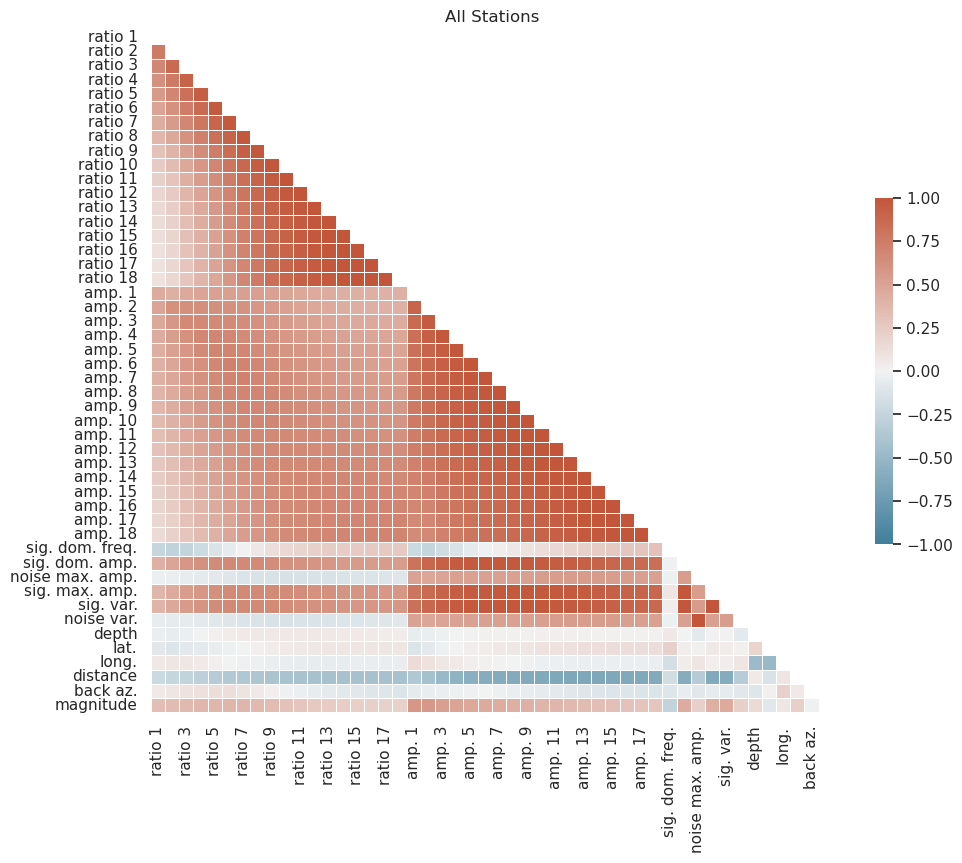

In [24]:
fp.plot_pairwise_correlations(X_train, 
                           y_train, 
                           alt_names, 
                           'All Stations')

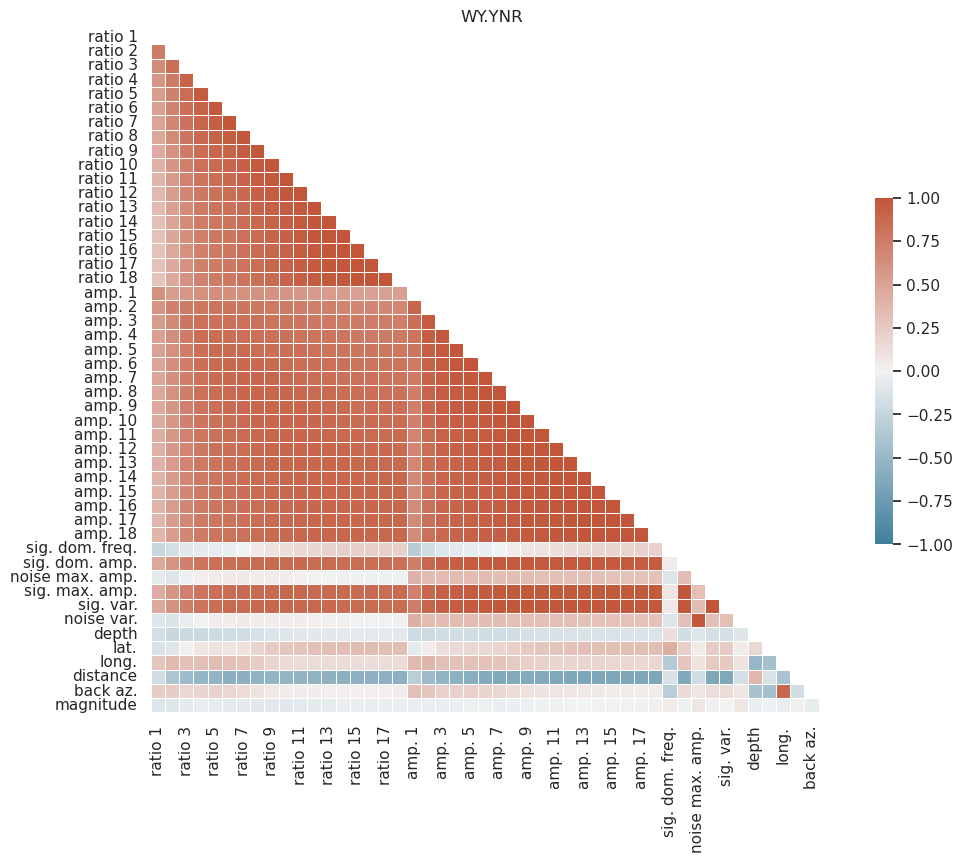

In [25]:
fp.plot_pairwise_correlations(station_feature_dict['YNR']['X_train'], 
                           station_feature_dict['YNR']['y_train'], 
                           alt_names, 
                           'WY.YNR')

## Look at the F-statistic of each feature to get a sense of which are the most important 

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [27]:
def f_reg_feature_selection(X, y):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    fs.transform(X)

    return fs

In [28]:
def compute_multiple_station_feature_scores(n_features, stat_feat_dict, fs_method):
    scores = np.full((n_features, len(stat_feat_dict.keys())), -1, dtype=float)
    station_order = []
    for i, station in enumerate(stat_feat_dict.keys()):
        fs = fs_method(stat_feat_dict[station]['X_train'],
                                stat_feat_dict[station]['y_train'])
        scores[:, i] = fs.scores_
        station_order.append(station)
    station_order = np.array(station_order)
    assert np.all(scores > -1)
    return scores, station_order

In [29]:
def plot_score_box_whisker(dists, title, xlabels, ylabel, sort_col_inds=None):
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    ax1.set_title(title)
    if sort_col_inds is not None:
        dists = dists[:, sort_col_inds]
        xlabels = np.array(xlabels)[sort_col_inds]
    ax1.boxplot(dists);
    ax1.set_xticks(np.arange(1, len(xlabels)+1), labels=xlabels, rotation=90, fontsize=8);
    ax1.set_ylabel(ylabel)

In [30]:
f_reg_scores, f_reg_station_order = compute_multiple_station_feature_scores(len(feature_names),
                                                                            station_feature_dict,
                                                                            f_reg_feature_selection)

In [31]:
f_reg_scores

array([[4.77815951e+02, 2.18395817e+02, 2.26723023e+02, ...,
        9.18826937e+01, 7.34593618e+01, 1.05253123e+02],
       [5.58167037e+02, 4.47762595e+02, 4.66426477e+02, ...,
        1.92152232e+02, 1.43421032e+02, 8.40781961e+01],
       [6.41256973e+02, 6.69816480e+02, 7.18506234e+02, ...,
        2.53237244e+02, 1.78294485e+02, 1.13430794e+02],
       ...,
       [1.07892759e+02, 7.26069854e+01, 6.04395733e+01, ...,
        5.70775545e-01, 9.56598041e+00, 1.67403028e+00],
       [1.31950250e+02, 1.18431305e+02, 1.69076072e+02, ...,
        3.64980174e+01, 4.50000212e+00, 7.35480524e+00],
       [2.46738051e+01, 1.13436762e+01, 3.94250555e-01, ...,
        6.57284991e-01, 1.86370354e+00, 3.91841221e+00]])

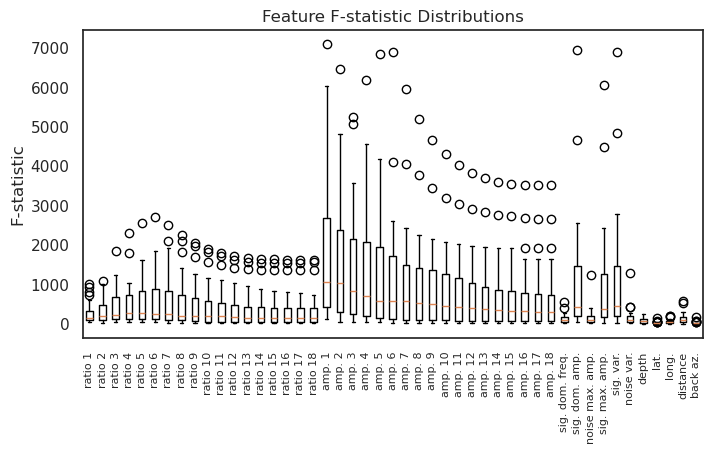

In [32]:
plot_score_box_whisker(f_reg_scores.T, 
                 'Feature F-statistic Distributions',
                 alt_names, 
                 'F-statistic')

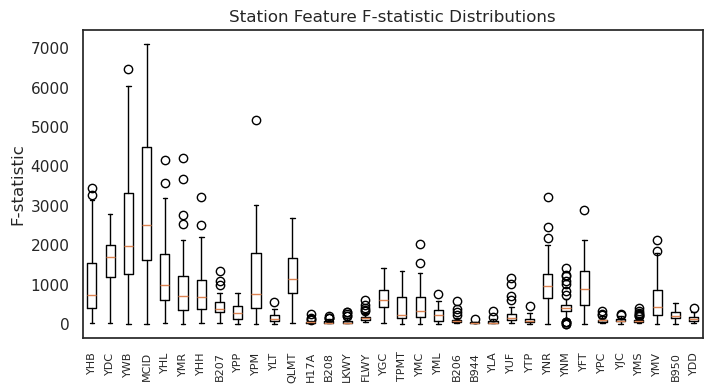

In [33]:
plot_score_box_whisker(f_reg_scores, 
                 'Station Feature F-statistic Distributions',
                 f_reg_station_order, 
                 'F-statistic')

In [34]:
def plot_station_score_bar_chart(scores, stat_order, stat, xlabels, ylabel):
    fig = plt.figure(figsize=(8, 4))
    s_scores = scores[:, np.where(stat_order == stat)[0][0]]
    plt.title(stat)
    plt.bar([i for i in range(len(s_scores))], s_scores)
    plt.xlim([-1, len(s_scores)])
    plt.xticks(np.arange(len(s_scores)), labels=xlabels, rotation=90, fontsize=8)
    plt.ylabel(ylabel)
    plt.show()

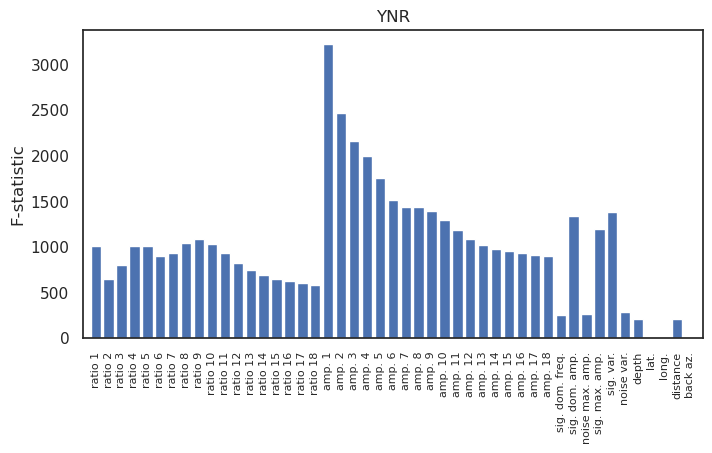

In [35]:
plot_station_score_bar_chart(f_reg_scores, 
                             f_reg_station_order,
                             'YNR',
                             alt_names,
                             'F-statistic')

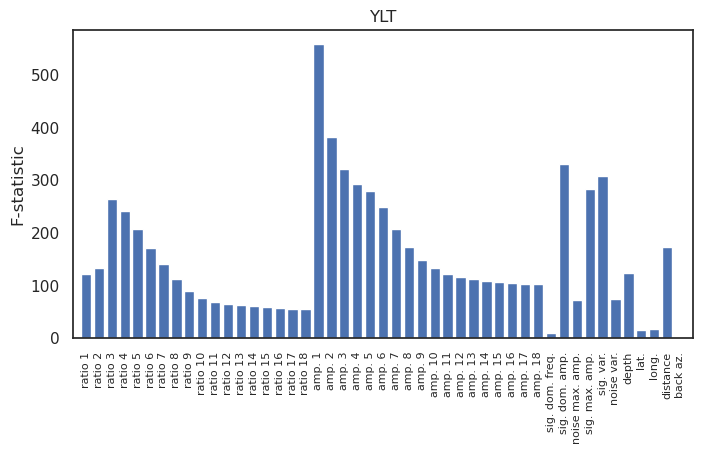

In [36]:
plot_station_score_bar_chart(f_reg_scores, 
                             f_reg_station_order,
                             'YLT',
                             alt_names,
                             'F-statistic')

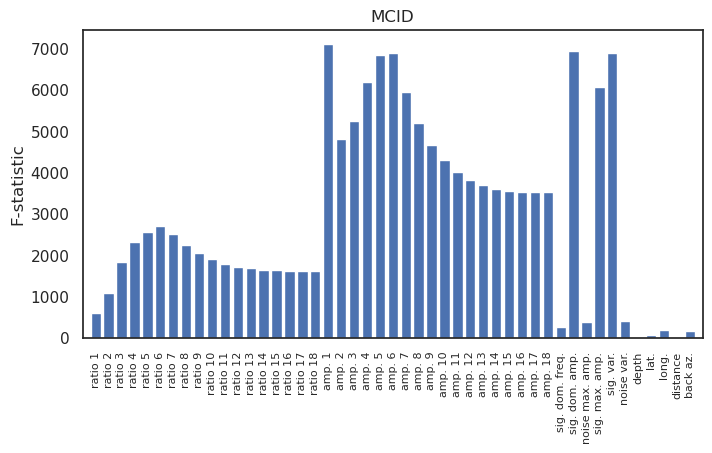

In [37]:
plot_station_score_bar_chart(f_reg_scores, 
                             f_reg_station_order,
                             'MCID',
                             alt_names,
                             'F-statistic')

In [38]:
def feature_rankings_for_individual_stations(scores):
    # Rankings in ascending order (lower number is more important feature)
    rankings = np.full_like(scores.T, -1, dtype='int')
    for stat_ind in range(scores.shape[1]):
        rankings[stat_ind, :] = np.argsort(-1*scores[:, stat_ind])

    return rankings

def rank_features_across_stations(scores, stat_rankings):
    feat_rankings = np.full_like(scores, -1, dtype='int')
    for feat_ind in range(stat_rankings.shape[1]):
        feat_rankings[feat_ind, :] = np.where(stat_rankings == feat_ind)[1]

    return feat_rankings

In [39]:
f_reg_stat_feat_rankings = feature_rankings_for_individual_stations(f_reg_scores)
f_reg_feat_rankings = rank_features_across_stations(f_reg_scores, f_reg_stat_feat_rankings)

In [40]:
assert np.array_equal(feature_names[np.argsort(-1*f_reg_scores[:, np.where(f_reg_station_order == 'YNR')[0][0]])],
                      feature_names[f_reg_stat_feat_rankings[np.where(f_reg_station_order == 'YNR')[0][0], :]]),\
                      'Feature ranking function did not work correctly'

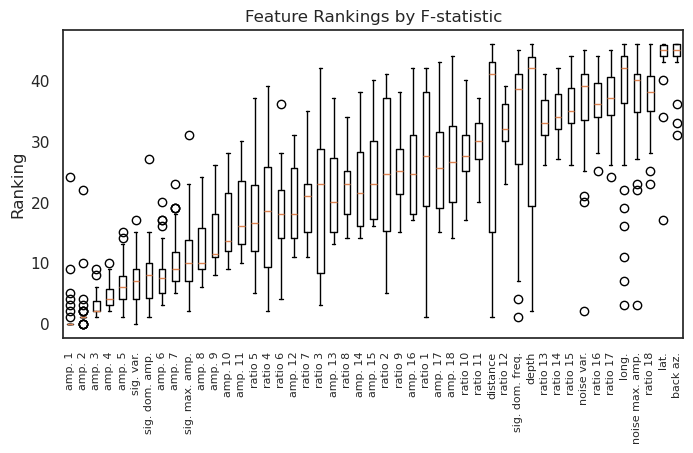

In [41]:
plot_score_box_whisker(f_reg_feat_rankings.T, 
                 'Feature Rankings by F-statistic',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(f_reg_feat_rankings, axis=1)))

In [42]:
f_reg_summary_rankings = feature_names[np.argsort(np.sum(f_reg_feat_rankings, axis=1))]

In [43]:
assert np.array_equal(feature_names[np.argsort(np.sum(f_reg_feat_rankings, axis=1))],
               feature_names[np.argsort(np.average(f_reg_feat_rankings, axis=1))]),\
               'Average and Sum or feature ranking do not produce the same order of features'

## Look at the mutual info of each feature to get a sense of which are the most important 

In [44]:
from sklearn.feature_selection import mutual_info_regression


In [45]:
def mutual_reg_feature_selection(X, y):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    fs.transform(X)
    
    return fs

In [46]:
mutual_reg_scores, mutual_reg_station_order = compute_multiple_station_feature_scores(len(feature_names),
                                                                            station_feature_dict,
                                                                            mutual_reg_feature_selection)

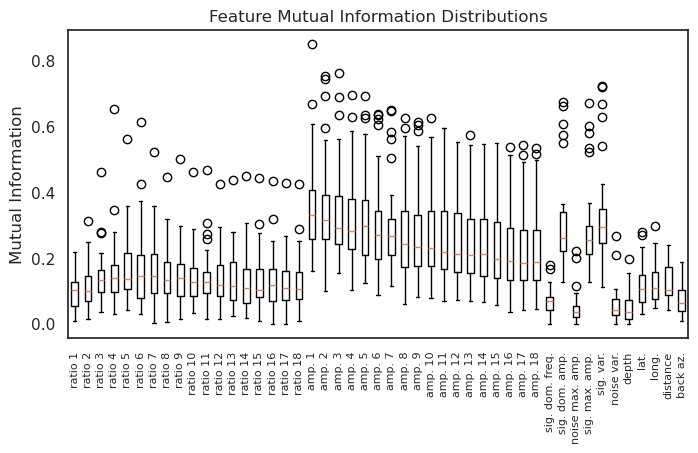

In [47]:
plot_score_box_whisker(mutual_reg_scores.T, 
                 'Feature Mutual Information Distributions',
                 alt_names, 
                 'Mutual Information')

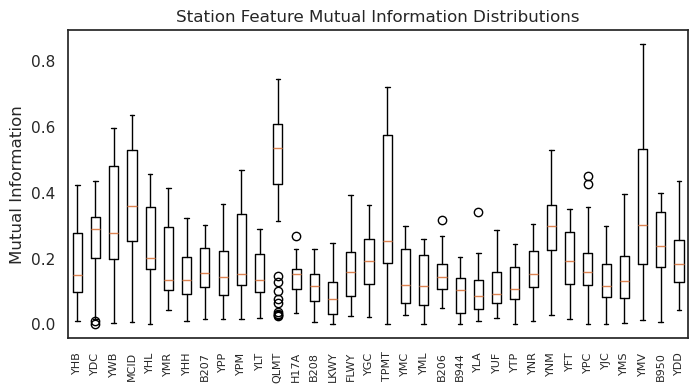

In [48]:
plot_score_box_whisker(mutual_reg_scores, 
                 'Station Feature Mutual Information Distributions',
                 mutual_reg_station_order, 
                 'Mutual Information')

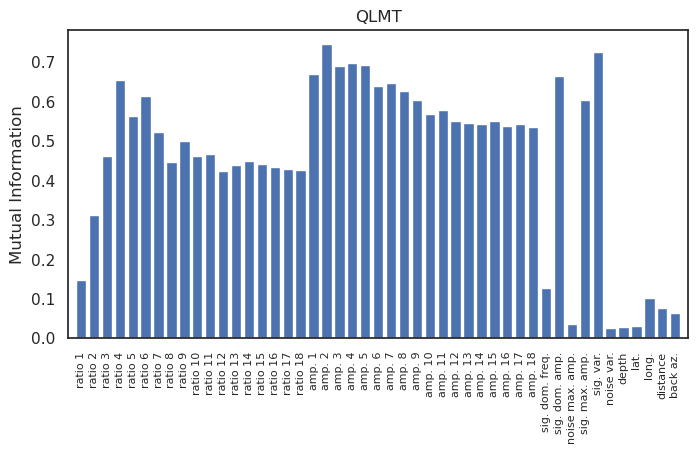

In [49]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'QLMT',
                             alt_names,
                             'Mutual Information')

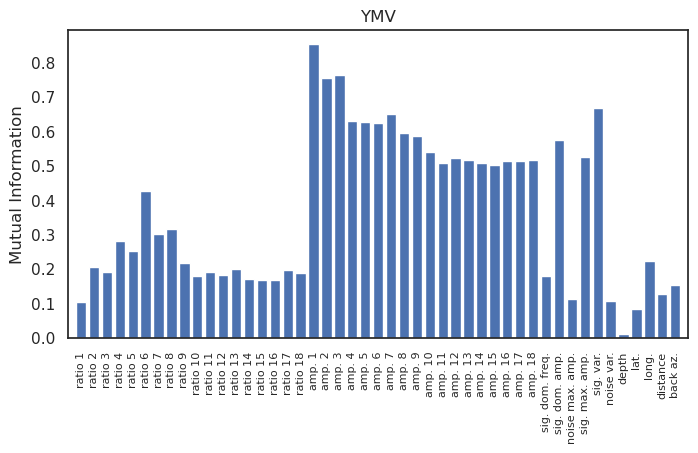

In [50]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'YMV',
                             alt_names,
                             'Mutual Information')

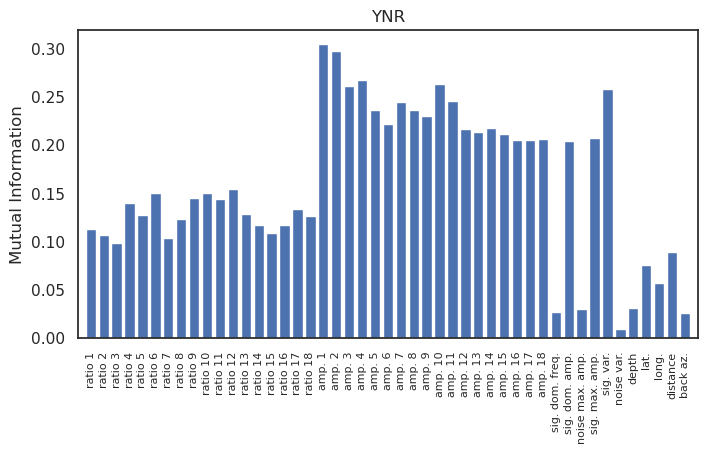

In [51]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'YNR',
                             alt_names,
                             'Mutual Information')

In [52]:
mutual_reg_stat_feat_rankings = feature_rankings_for_individual_stations(mutual_reg_scores)
mutual_reg_feat_rankings = rank_features_across_stations(mutual_reg_scores, mutual_reg_stat_feat_rankings)

In [53]:
assert np.array_equal(feature_names[np.argsort(-1*mutual_reg_scores[:, np.where(mutual_reg_station_order == 'YNR')[0][0]])],
                      feature_names[mutual_reg_stat_feat_rankings[np.where(mutual_reg_station_order == 'YNR')[0][0], :]]),\
                      'Feature ranking function did not work correctly'

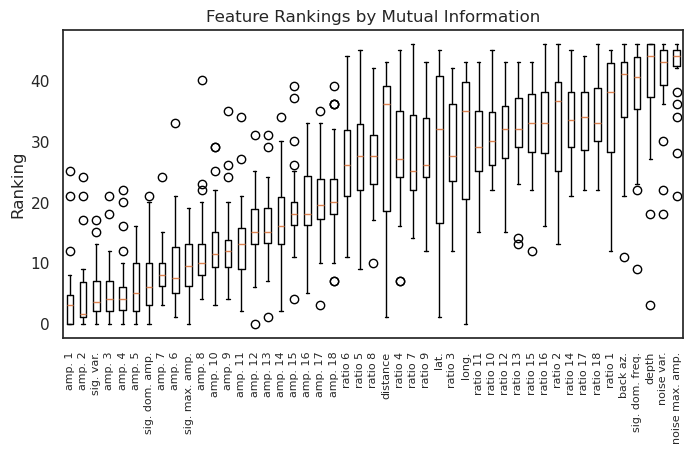

In [54]:
plot_score_box_whisker(mutual_reg_feat_rankings.T, 
                 'Feature Rankings by Mutual Information',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(mutual_reg_feat_rankings, axis=1)))

In [55]:
mutual_reg_summary_rankings = feature_names[np.argsort(np.sum(mutual_reg_feat_rankings, axis=1))]

# Look at important features from both F-stat and Mutual Information next to each other

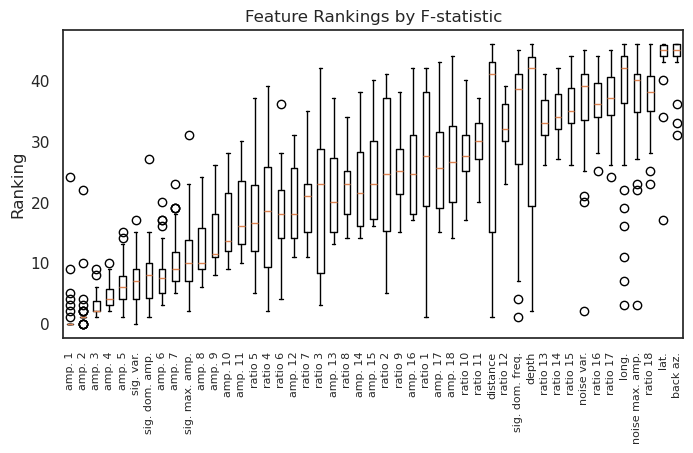

In [56]:
plot_score_box_whisker(f_reg_feat_rankings.T, 
                 'Feature Rankings by F-statistic',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(f_reg_feat_rankings, axis=1)))

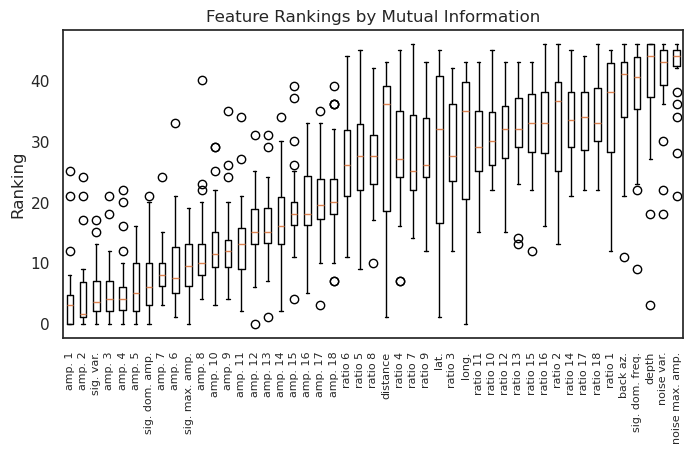

In [57]:
plot_score_box_whisker(mutual_reg_feat_rankings.T, 
                 'Feature Rankings by Mutual Information',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(mutual_reg_feat_rankings, axis=1)))

In [58]:
mutual_reg_summary_rankings

array(['amp_1', 'amp_2', 'signal_variance', 'amp_3', 'amp_4', 'amp_5',
       'signal_dominant_amplitude', 'amp_7', 'amp_6',
       'signal_max_amplitude', 'amp_8', 'amp_10', 'amp_9', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'amp_ratio_6', 'amp_ratio_5', 'amp_ratio_8',
       'source_receiver_distance_logkm', 'amp_ratio_4', 'amp_ratio_7',
       'amp_ratio_9', 'source_latitude', 'amp_ratio_3',
       'source_longitude', 'amp_ratio_11', 'amp_ratio_10', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_15', 'amp_ratio_16', 'amp_ratio_2',
       'amp_ratio_14', 'amp_ratio_17', 'amp_ratio_18', 'amp_ratio_1',
       'source_receiver_back_azimuth_sine', 'signal_dominant_frequency',
       'source_depth_km', 'noise_variance', 'noise_max_amplitude'],
      dtype='<U33')

In [59]:
f_reg_summary_rankings

array(['amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'signal_variance',
       'signal_dominant_amplitude', 'amp_6', 'amp_7',
       'signal_max_amplitude', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_ratio_5', 'amp_ratio_4', 'amp_ratio_6', 'amp_12',
       'amp_ratio_7', 'amp_ratio_3', 'amp_13', 'amp_ratio_8', 'amp_14',
       'amp_15', 'amp_ratio_2', 'amp_ratio_9', 'amp_16', 'amp_ratio_1',
       'amp_17', 'amp_18', 'amp_ratio_10', 'amp_ratio_11',
       'source_receiver_distance_logkm', 'amp_ratio_12',
       'signal_dominant_frequency', 'source_depth_km', 'amp_ratio_13',
       'amp_ratio_14', 'amp_ratio_15', 'noise_variance', 'amp_ratio_16',
       'amp_ratio_17', 'source_longitude', 'noise_max_amplitude',
       'amp_ratio_18', 'source_latitude',
       'source_receiver_back_azimuth_sine'], dtype='<U33')

Since amplitudes and amplitude ratios are highly correlated - focus on those with the most information w.r.t. magnitude

Amps: 1-5  
Ratio: 4-7  

Top 7 ratios   
Mutual: 6, 5, 8, 7, 4, 9, 3  
F-Stat: 5, 4, 6, 7, 3, 8, 2  


The issue with this though is that it is possible some of the other amps or ratios that are less relevant for magnitude by themselves, but they could be helpful when combined with other features.

In [60]:
feature_subset = ['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_variance',
'signal_dominant_amplitude', 'signal_max_amplitude','signal_dominant_frequency',
'noise_max_amplitude', 'noise_variance', 
'source_depth_km', 'source_latitude',
'source_longitude', 'source_receiver_distance_logkm',
'source_receiver_back_azimuth_sine']

In [61]:
feature_subset_cols = np.where(np.isin(feature_names, feature_subset))[0]
feature_subset_cols

array([ 3,  4,  5,  6, 18, 19, 20, 21, 22, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46])

In [62]:
np.array(alt_names)[feature_subset_cols]

array(['ratio 4', 'ratio 5', 'ratio 6', 'ratio 7', 'amp. 1', 'amp. 2',
       'amp. 3', 'amp. 4', 'amp. 5', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'lat.', 'long.', 'distance', 'back az.'], dtype='<U15')

In [63]:
X_train[:, feature_subset_cols].shape

(55622, 20)

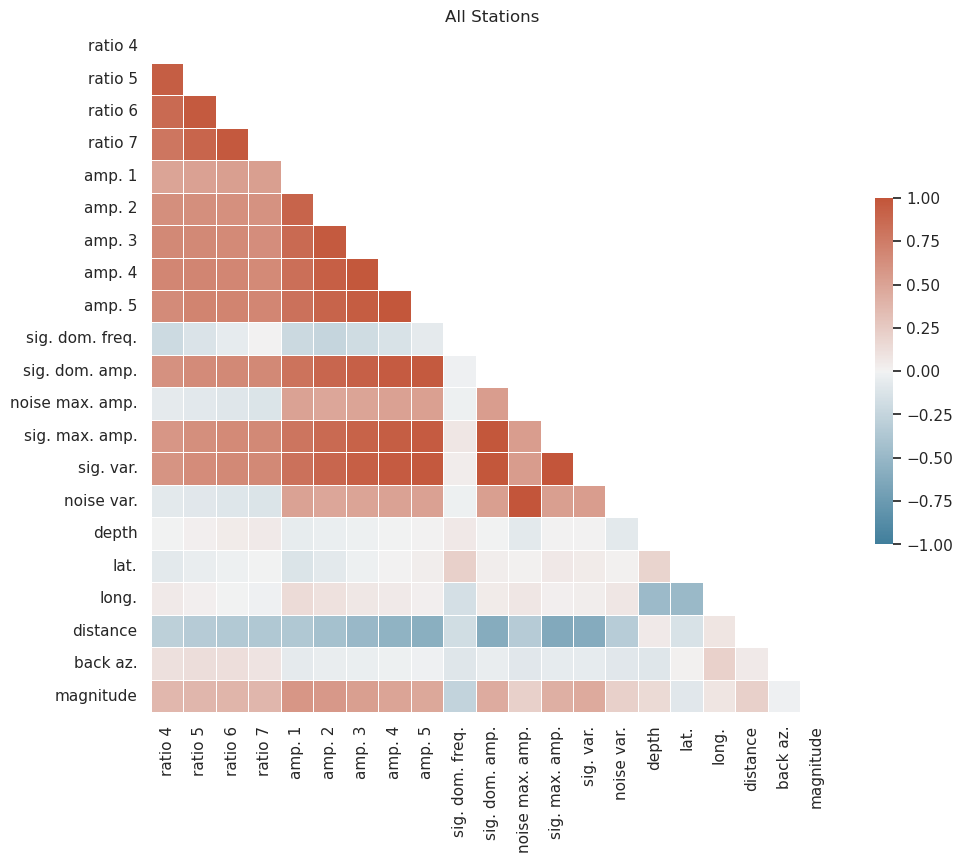

In [64]:
fp.plot_pairwise_correlations(X_train[:, feature_subset_cols], 
                           y_train, 
                           np.array(alt_names)[feature_subset_cols], 
                           'All Stations',
                           xticklabels=1)

# Recursive Feature Elimination 

Move this to a different notebook. Don't use both lat/lon and dist/az at the same time

Make sure using nested cv? Try different estimators. 

Followed example from [Machine Learning Mastery](https://machinelearningmastery.com/rfe-feature-selection-in-python/)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [ ]:
# create pipeline
rfe = RFECV(estimator=DecisionTreeRegressor())
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('R^2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
n_scores

In [ ]:
rfe = RFECV(estimator=DecisionTreeRegressor())
rfe.fit(X_train, y_train)

In [ ]:
# summarize all features
for i in range(X_train.shape[1]):
 print('Column: %d, Name %s, Selected %s, Rank: %.3f' % (i, feature_names[i], rfe.support_[i], rfe.ranking_[i]))

In [ ]:
feature_names[np.argsort(rfe.ranking_)][0:rfe.n_features_]

# Gradient Boosted Tree (move this to a different notebook)

In [ ]:
from sklearn import ensemble
from sklearn.metrics import r2_score


In [ ]:
ynr_X_train_xgb = np.copy(ynr_train_X)


In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)

reg.fit(ynr_train_X, ynr_train_y)

In [ ]:
r2_score(ynr_train_y, reg.predict(ynr_train_X))

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feat_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, ynr_train_X, ynr_train_y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feat_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
ynr_X_test, _, _ = compute_feature_matrix(ynr_test, scaler=ynr_train_scaler, source_dist_type='all')

In [ ]:
ynr_X_test.shape

In [ ]:
ynr_y_test = ynr_test['Event-Mean-YPML-S']

In [ ]:
r2_score(ynr_y_test, reg.predict(ynr_X_test))